In [10]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_breast_cancer

In [11]:
def load_dataset():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    X_train = np.array(train_dataset["train_set_x"][:])
    Y_train = np.array(train_dataset["train_set_y"][:])
    train_dataset.close()
    
    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    X_test = np.array(test_dataset["test_set_x"][:])
    Y_test = np.array(test_dataset["test_set_y"][:])
    test_dataset.close()
    
    classes = ['non-cat', 'cat']
    Y_train = Y_train.reshape(-1, 1)
    Y_test = Y_test.reshape(-1, 1)
    
    return X_train, Y_train, X_test, Y_test, classes

X_train, Y_train, X_test, Y_test, classes = load_dataset()


In [12]:
m_train = X_train.shape[0]
m_test = X_test.shape[0]
num_px = X_train.shape[1]
X_train_flat = X_train.reshape(m_train, -1) / 255.
X_test_flat = X_test.reshape(m_test, -1) / 255.

In [13]:
model_cat = LogisticRegression()
model_cat.fit(X_train_flat, Y_train.ravel())

LogisticRegression()

In [14]:
Y_pred_cat = model_cat.predict(X_test_flat)
accuracy_cat = accuracy_score(Y_test, Y_pred_cat)
print(f'Cat Classification Accuracy: {accuracy_cat:.4f}')
print('Cat Classification Report:\n', classification_report(Y_test, Y_pred_cat))

Cat Classification Accuracy: 0.7200
Cat Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.76      0.65        17
           1       0.85      0.70      0.77        33

    accuracy                           0.72        50
   macro avg       0.71      0.73      0.71        50
weighted avg       0.75      0.72      0.73        50



In [15]:
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
model_cancer = LogisticRegression()
model_cancer.fit(X_train, y_train)

LogisticRegression()

In [19]:
y_pred_cancer = model_cancer.predict(X_test)

In [20]:
accuracy_cancer = accuracy_score(y_test, y_pred_cancer)
print(f'Cancer Classification Accuracy: {accuracy_cancer:.4f}')
print('Cancer Classification Report:\n', classification_report(y_test, y_pred_cancer))

Cancer Classification Accuracy: 0.9737
Cancer Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



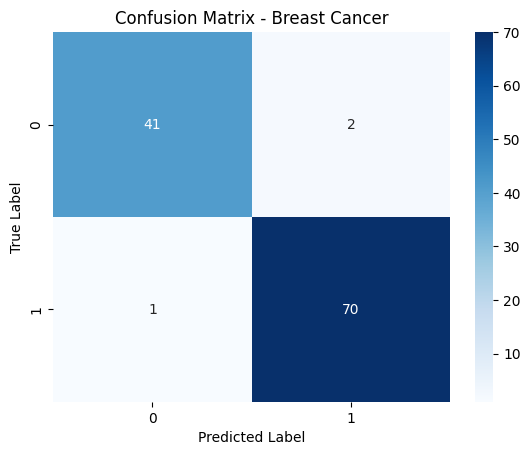

In [21]:
sns.heatmap(confusion_matrix(y_test, y_pred_cancer), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Breast Cancer')
plt.show()